- Launch as slides with 

```bash
$ jupyter nbconvert --to slides python-functions-and-classes.ipynb --post serve --TemplateExporter.extra_template_basedirs=${PWD}/slide_templates/ --template revealx
```

# Functions and Classes

This notebook demonstrates different ways of defining functions and Python classes.

The general problem here is that we want to write a function that can take general input and do something with it, but where "do something" itself may involve some hyperparameters that we'd like to be able to easily change.

In terms of SC Project #3, the input is a `Nx3` array of `(x,y,z)` Cartesian coordinates for `N` points and the hyperparameters are the $\epsilon$ and $\sigma$ used in the definition of the Lennard-Jones potential 

$  v_{LJ}(r_{ij}) = 4\epsilon \left( \left(\frac{\sigma}{r_{ij}}\right)^{12}  - \left(\frac{\sigma}{r_{ij}}\right)^6 \right)$.


In [1]:
# Preliminaries
import numpy as np
from numpy import newaxis, fill_diagonal, sum, sqrt
NA = newaxis

# Experimental values for Argon atoms
EPSILON=0.997; # kJ/mol
SIGMA=  3.401; # Ångstrom

def distance(points):
    # points: (N,3)-array of (x,y,z) coordinates for N points
    # distance(points): returns (N,N)-array of inter-point distances:
    displacement = points[:, NA] - points[NA, :]
    return sqrt(sum(displacement*displacement, axis=-1))


# A compound function

This is the method that is provided in the materials for Project3.  It involves writing "parent" and "child" functions where the hyperparameters are provided as keywords to the parent function and which are then local variables to the child function.

In [2]:
def compound_parent(a=1, b=2):
    def _child(x):
        """
        Child function of `compound_parent`
        """
        print(f'(inside _child) a={a}, b={b}, input x = {x}, a+b*x = {a+b*x}')
        return a+b*x

    return _child

In [3]:
# "initialize" the function
func = compound_parent(a=1, b=4)

# Call it
result = func(3)

print('output of the child function: ', result)

(inside _child) a=1, b=4, input x = 3, a+b*x = 13
output of the child function:  13


Other than the `print()` statement inserted in `_child`, which you wouldn't want to do other than for debugging purposes, there is no way to figure out from `_func` what the values of the hyperparameters were upon initialization or to change them without reinitializing another function.

In [55]:
# "help" prints the docstring of an object in jupyter, 
# but no way to find out the local values of the hyperparameters
# (i.e., local variable) of our function
func?

Signature: func(x)
Docstring: Child function of `compound_parent`
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/3176197953.py
Type:      function

So if we want to make a different version of the function with different values of the hyper parameters, we have to reinitialize it.

*Initialization could potentially involve significant overhead, e.g., if there were a lot of data I/O to keep track of.*

In [5]:
# Initialize the child from the parent
new_func = compound_parent(a=-1, b=3)

# Call it
result = new_func(3)

print('output of the child function: ', result)

(inside _child) a=-1, b=3, input x = 3, a+b*x = 8
output of the child function:  8


In [6]:
# "help" still doesn't help
new_func?

Signature: new_func(x)
Docstring: Child function of `compound_parent`
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/3176197953.py
Type:      function

In [7]:
def LJ(sigma=SIGMA, epsilon=EPSILON):
    def V(points):
        # points: (N,3)-array of (x,y,z) coordinates for N points
        dist = distance(points)

        # Fill diagonal with 1, so we don't divide by zero
        fill_diagonal(dist, 1)

        # dimensionless reciprocal distance
        f = sigma/dist

        # calculate the interatomic potentials
        pot = 4*epsilon*(f**12 - f**6)

        # Undo any diagonal terms (the particles don't interact with themselves)
        fill_diagonal(pot, 0)

        # We could return the sum of just the upper triangular part, corresponding
        # to equation 2 in the assignment text. But since the matrix is symmetric,
        # we can just sum over all elements and divide by 2
        return sum(pot)/2
    return V

# A function with (keyword) arguments

An alternative method is to just require that the hyperparameters are provided at the moment the function is called. If provided as keyword arguments, default values can be provided that will be used if not otherwise specified.

In [8]:
# Here there is no parent / child relationship, just a single function
def function_with_args(x, a, b):
    """
    All arguments must be passed explicitly
    """
    print(f'a={a}, b={b}, input x = {x}, a+b*x = {a+b*x}')
    return a+b*x

In [9]:
# help
function_with_args?

Signature: function_with_args(x, a, b)
Docstring: All arguments must be passed explicitly
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/1574258618.py
Type:      function

In [10]:
# This breaks because you have to specify all arguments at runtime
result = function_with_args(3)

TypeError: function_with_args() missing 2 required positional arguments: 'a' and 'b'

In [11]:
# This is ok
result = function_with_args(3, 1, 2)

a=1, b=2, input x = 3, a+b*x = 7


In [12]:
# But the *order* of the arguments is fixed
# (this breaks with an AssertionError exception)
assert function_with_args(3, 1, 2) == function_with_args(3, 2, 1)

a=1, b=2, input x = 3, a+b*x = 7
a=2, b=1, input x = 3, a+b*x = 5


AssertionError: 

In [13]:
def function_with_keywords(x, a=1, b=2):
    """
    Function with keyword arguments
    """
    print(f'a={a}, b={b}, input x = {x}, a+b*x = {a+b*x}')
    return a+b*x

In [14]:
# Now the function with keywords
result = function_with_keywords(3)
print('output of the function with keywords: ', result)

a=1, b=2, input x = 3, a+b*x = 7
output of the function with keywords:  7


In [15]:
# Change one of the keywords from the default
result = function_with_keywords(3, b=4)

a=1, b=4, input x = 3, a+b*x = 13


In [16]:
# help at least shows you what the defaults are
function_with_keywords?

Signature: function_with_keywords(x, a=1, b=2)
Docstring: Function with keyword arguments
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/2365790902.py
Type:      function

In [17]:
# The order of the keywords specified at runtime doesn't matter
assert function_with_keywords(3, a=1, b=2) == function_with_keywords(3, b=2, a=1)

a=1, b=2, input x = 3, a+b*x = 7
a=1, b=2, input x = 3, a+b*x = 7


In [18]:
# Write the potential as a function with keywords
def Vfunc(points, sigma=SIGMA, epsilon=EPSILON):
    """
    Calculate the Lennard-Jones potential for a list of points
    """
    # points: (N,3)-array of (x,y,z) coordinates for N points
    dist = distance(points)

    # Fill diagonal with 1, so we don't divide by zero
    fill_diagonal(dist, 1)

    # dimensionless reciprocal distance
    f = sigma/dist

    # calculate the interatomic potentials
    pot = 4*epsilon*(f**12 - f**6)

    # Undo any diagonal terms (the particles don't interact with themselves)
    fill_diagonal(pot, 0)

    # We could return the sum of just the upper triangular part, corresponding
    # to equation 2 in the assignment text. But since the matrix is symmetric,
    # we can just sum over all elements and divide by 2
    return sum(pot)/2


# Define a Class (preferred)

Python "Classes" provide a means of bundling data and functionality together.  Here we want just want to use this in a simple way to more easily keep track of the hyperparameters, but there are many more ways that Classes are useful.

See [$\S$9 of the Python tutorial](https://docs.python.org/3/tutorial/classes.html) for more introductory information.

In [19]:
A = np.array([[1,0],[0,1]])
print(A)

[[1 0]
 [0 1]]


In [20]:
my_string = 'abc'
my_string.title()

'Abc'

In [21]:
# This is similar to our "parent/child" relationship of the first compound function example,
# but is much more flexible
class MyClass:
    def __init__(self, a=1, b=2):
        """
        This function is called when MyClass is "instantiated".
        
        Hyperparameters are set as "attributes" of the class
        """
        self.a = a
        self.b = b
    
    def do_something(self, x):
        """
        A function to do something with input data
        """
        print(f'(do_something class method) a={self.a}, b={self.b}, input x = {x}, a+b*x = {self.a+self.b*x}')
        return self.a + self.b*x

In [22]:
# "instantiate" the class
my_instance = MyClass()

# Call the function, i.e., the class "method"
my_instance.do_something(3)

(do_something class method) a=1, b=2, input x = 3, a+b*x = 7


7

In [23]:
# The hyperparameters are modifiable "attributes" of the class
print('a: ', my_instance.a)

a:  1


In [24]:
# Modify the attributes and they will be used when the method is called
my_instance.a = 5
my_instance.do_something(3)

(do_something class method) a=5, b=2, input x = 3, a+b*x = 11


11

We can use the class [builtins](https://docs.python.org/3/library/builtins.html#module-builtins) to add additional functionality / documentation

In [25]:
# This prints the builtin `__str__` method of the class
print(MyClass)

<class '__main__.MyClass'>


In [26]:
# Or similarly for the instance of the class
print(my_instance)

In [27]:
# Our class doesn't have a __call__ method that would make it directly callable
my_instance(3)

TypeError: 'MyClass' object is not callable

But we can override the `__str__` method and write the `__call__` methods:

In [28]:
# Our class now includes __str__ and __class__ methods and more informative docstrings

class BetterClass:

    def __init__(self, a=1, b=2):
        """
        This function is called when MyClass is "instantiated".

        Hyperparameters are set as "attributes" of the class

        And better still, describe them:

        Attributes
        ----------
        a : int
            Parameter that means something

        b : int
            Parameter that means something else
        """
        self.a = a
        self.b = b
    
    
    def __str__(self):
        """
        Override the __str__ builtin to print some information about our hyperparameters
        """
        return f"{self.__class__} object with a={self.a} b={self.b}"


    def do_something(self, x):
        """
        A function to do something with input data

        Parameters
        ----------
        x : float
            Input data

        Returns
        -------
        result : float
            a + b*x
        
        """
        print(f'(do_something class method) a={self.a}, b={self.b}, input x = {x}, a+b*x = {self.a+self.b*x}')
        return self.a + self.b*x

        
    def __call__(self, x):
        """
        Make the instance callable, passing data `x` to the `do_something` method and returning the result
        """
        return self.do_something(x)
        

In [29]:
better = BetterClass(a=1, b=2)

# Printing now shows the result that we coded above
print(better)
print(better.__str__()) # the same

<class '__main__.BetterClass'> object with a=1 b=2
<class '__main__.BetterClass'> object with a=1 b=2


In [30]:
# And the instance is now callable
better(3)

(do_something class method) a=1, b=2, input x = 3, a+b*x = 7


7

In [31]:
# Change an attribute
better.a = 3
print(better)

<class '__main__.BetterClass'> object with a=3 b=2


In [32]:
# Calling uses the updated attributes
better(3)

(do_something class method) a=3, b=2, input x = 3, a+b*x = 9


9

# Now define the Lennard-Jones potential as a class

This looks like a substantial amount of coding overhead, but there are dramatic benefits for 
- improving *readibility* (and therefore *maintainability*)
- enabiling extending the code functionality to other similar use cases


In [58]:
class LJPotential():

    # Define default attributes here
    sigma = SIGMA
    epsilon = EPSILON
    element = None
    
    def __init__(self, element=None, sigma=None, epsilon=None):
        """
        Base class for the Lennard-Jones potential
        
        hyperparameters sigma and epsilon are "attributes" of the class.
        
        Note that writing the __init__ function this way uses the global varables SIGMA, EPSILON defined above

        Attributes
        ----------
        element : str
            Optional name of the element we're calculating
        sigma : float
            Inter-particle distance where the potential is zero

        epsilon : 
            Minimal potential between two atoms
            
        """
        # Override default is specified at init
        if sigma is not None:
            self.sigma = sigma
            
        if epsilon is not None:
            self.epsilon = epsilon

        if element is not None:
            self.element = element

    
    def __repr__(self):
        """
        Override the __repr__ builtin to include some information about our hyperparameters
        """
        msg = f"{self.__class__}: Lennard-Jones potential"
        if isinstance(self.element, str):
            msg += f" of {self.element}"

        msg += f" with sigma={self.sigma:.3f} epsilon={self.epsilon:.3f}"
        return  msg

    
    @staticmethod
    def distance(points):
        """
        Calculate the distance between all points.
        
        Here the "staticmethod" just takes data as input and doesn't pass `self` as the first argument.  This makes
        the method callable even if the class isn't instantiated, but note that it doesn't have access to the 
        class attributes.
        
        Parameters
        ----------
        points : (N,3) array
            Cartesian (x,y,z) coordinates for N points

        Returns
        -------
        r : (N, N) array
            Cartesian distance between all points (diagonal = 0)
        """
        
        # distance(points): returns (N,N)-array of inter-point distances:
        displacement = points[:, NA] - points[NA, :]
        return np.sqrt(np.sum(displacement*displacement, axis=-1))


    def potential(self, dist):
        """
        General calculation of the potential for arbitrary input 

        Parameters
        ----------
        dist : array-like
            Distances

        Returns
        -------
        pot : array-like
            Potential evaluated at ``dist``
        """
        # dimensionless reciprocal distance
        f = self.sigma/dist

        # calculate the interatomic potentials
        pot = 4*self.epsilon*(f**12 - f**6)

        return pot
    
    
    def V(self, points):
        """
        Total Lennard-Jones potential of a system of points

        Note that this method *calls* the method ``potential``, which takes arbitrary input distances
        
        Parameters
        ----------
        points : (N,3) array
            Cartesian (x,y,z) coordinates for N points

        Returns
        -------
        pot : float
            Total potential
            
        """
        # points: (N,3)-array of (x,y,z) coordinates for N points
        dist = self.distance(points)

        # Fill diagonal with 1, so we don't divide by zero
        np.fill_diagonal(dist, 1)

        # Calculate all of the rij potentials
        pot = self.potential(dist)
        
        # Undo any diagonal terms (the particles don't interact with themselves)
        np.fill_diagonal(pot, 0)

        # We could return the sum of just the upper triangular part, corresponding
        # to equation 2 in the assignment text. But since the matrix is symmetric,
        # we can just sum over all elements and divide by 2
        return np.sum(pot)/2

    
    def __call__(self, points):
        """ Return the potential `V(points)` """
        return self.V(points)

    

In [34]:
LJc = LJPotential(sigma=SIGMA, epsilon=EPSILON)

In [35]:
print(LJc)

<class '__main__.LJPotential'>: Lennard-Jones potential with sigma=3.401 epsilon=0.997


In [36]:
LJc.distance?

Signature: LJc.distance(points)
Docstring:
Calculate the distance between all points.

Here the "staticmethod" just takes data as input and doesn't pass `self` as the first argument.  This makes
the method callable even if the class isn't instantiated, but note that it doesn't have access to the 
class attributes.

Parameters
----------
points : (N,3) array
    Cartesian (x,y,z) coordinates for N points

Returns
-------
r : (N, N) array
    Cartesian distance between all points (diagonal = 0)
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/2366203880.py
Type:      function

In [37]:
LJc.potential?

Signature: LJc.potential(dist)
Docstring:
General calculation of the potential for arbitrary input 

Parameters
----------
dist : array-like
    Distances

Returns
-------
pot : array-like
    Potential evaluated at ``dist``
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/2366203880.py
Type:      method

In [38]:
LJc.V?

Signature: LJc.V(points)
Docstring:
Total Lennard-Jones potential of a system of points

Note that this method *calls* the method ``potential``, which takes arbitrary input distances

Parameters
----------
points : (N,3) array
    Cartesian (x,y,z) coordinates for N points

Returns
-------
pot : float
    Total potential
    
File:      /var/folders/dw/fyp140x977s3y5d2mdxw6m0w0000gn/T/ipykernel_80862/2366203880.py
Type:      method

# Compare the results

In [39]:
# Random position data
np.random.seed(1)
N = 3
points = np.random.rand(N, 3)

In [40]:
# Compound function
VLJ = LJ(sigma=SIGMA, epsilon=EPSILON)
VLJ(points)

1009685314327.9093

In [41]:
# Function with keywords
Vfunc(points, sigma=SIGMA, epsilon=EPSILON)

1009685314327.9093

In [42]:
# Class
LJc = LJPotential(sigma=SIGMA, epsilon=EPSILON)
# Call V method explicitly
LJc.V(points)

1009685314327.9093

In [43]:
# __call__ method calls V
LJc(points)

1009685314327.9093

## Extending class functionality

One use for this is that the `LJPotential` class we defined above can be *extended* to additional use cases just by changing the 
attribute defaults, i.e., the hyperparameters of the Lennard-Jones potential.

In [57]:
# Written this way, the new classes "inherit" the functionality of the `LJPotential` base class
class ArgonLJ(LJPotential):
    sigma = 3.401
    epsilon = 0.997
    element = "Argon"

class NeonLJ(LJPotential):
    # http://www.sklogwiki.org/SklogWiki/index.php/Neon#Lennard-Jones_parameters
    sigma = 0.2782
    epsilon = 3.0840
    element = "Neon"

In [59]:
# These have the same methods we defined for the LJPotential "base" class
ar = ArgonLJ()
ne = NeonLJ()

# "print" runs the `__repr__` builtin method we modified
print(ar)
print(ne)

<class '__main__.ArgonLJ'>: Lennard-Jones potential of Argon with sigma=3.401 epsilon=0.997
<class '__main__.NeonLJ'>: Lennard-Jones potential of Neon with sigma=0.278 epsilon=3.084


In [46]:
for el in [ar, ne]:
    print(f'Element: {el.element:>5}, V(points) = {el(points):>20.4f}')

Element: Argon, V(points) =   1009685314327.9093
Element:  Neon, V(points) =              -1.8346


In [47]:
# ar is an instance of the LJPotential base class
print(isinstance(ar, LJPotential))

True


In [48]:
print(ar.__class__.__bases__)

(<class '__main__.LJPotential'>,)


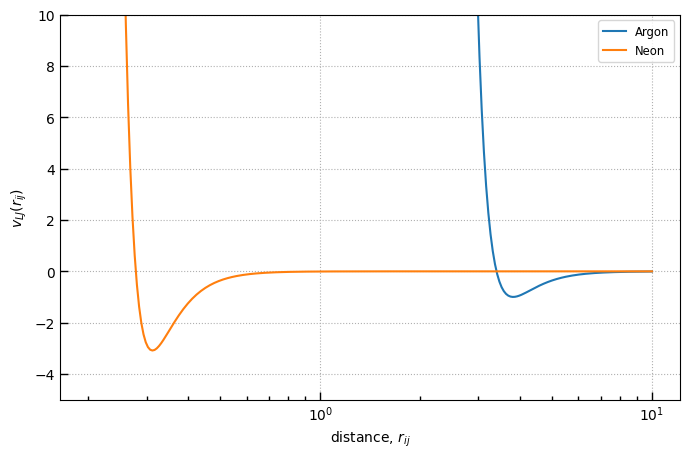

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8, 5))

# Plot 1D potentials
dist = np.logspace(np.log10(0.2), np.log10(10), 256)
for el in [ar, ne]:
    ax.plot(dist, el.potential(dist), label=el.element)

ax.set_ylim(-5, 10)
ax.semilogx()
ax.grid()
ax.legend()
ax.set_xlabel('distance, $r_{ij}$')
_ = ax.set_ylabel(r'$v_{LJ}(r_{ij})$')